## kaggle: https://www.kaggle.com/lewisduncan93/the-economic-freedom-index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('economic_freedom_index2019_data.csv',encoding = "ISO-8859-1")

In [3]:
print(df.shape)
df.head()

(186, 34)


,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [4]:
df = df[df['Country Name']!='Liechtenstein']

In [5]:
df.drop(['Country Name','CountryID','WEBNAME','Country'],axis=1,inplace=True)

In [6]:
print(df.shape)
df.head()

(185, 30)


,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,25.3,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,41.0,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 185
Data columns (total 30 columns):
Region                         185 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freedom             183 non-null float64
Financial Freedom              180 non-null float64
Tariff Rate (%)                182 non-null float64
Income Tax R

In [8]:
df['Population (Millions)'] = df['Population (Millions)'].astype(float)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 31 columns):
index                          185 non-null int64
Region                         185 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freedom             183 non-null float64
Financial Freedom              180 non-null float64
Tariff Rate (%

In [11]:
df['Unemployment (%)'].dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 31 columns):
index                          185 non-null int64
Region                         185 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freedom             183 non-null float64
Financial Freedom              180 non-null float64
Tariff Rate (%

In [13]:
df['FDI Inflow (Millions)'].dropna(inplace=True)

In [14]:
df.drop('GDP (Billions, PPP)',axis=1,inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 184
Data columns (total 30 columns):
index                          173 non-null int64
Region                         173 non-null object
World Rank                     173 non-null float64
Region Rank                    173 non-null float64
2019 Score                     173 non-null float64
Property Rights                173 non-null float64
Judical Effectiveness          173 non-null float64
Government Integrity           173 non-null float64
Tax Burden                     173 non-null float64
Gov't Spending                 173 non-null float64
Fiscal Health                  173 non-null float64
Business Freedom               173 non-null float64
Labor Freedom                  173 non-null float64
Monetary Freedom               173 non-null float64
Trade Freedom                  173 non-null float64
Investment Freedom             173 non-null float64
Financial Freedom              173 non-null float64
Tariff Rate (%

In [17]:
float(df['GDP per Capita (PPP)'][0].split()[0][1:-4])

1.0

In [18]:
df.reset_index(inplace=True)

In [19]:
for i in range(len(df)):
    try:
        df['GDP per Capita (PPP)'][i] = float((df['GDP per Capita (PPP)'][i].split()[0][1:-4]))
    except:
        df['GDP per Capita (PPP)'][i] = float(0)

In [20]:
df = df[df['GDP per Capita (PPP)']!=0]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 172
Data columns (total 31 columns):
level_0                        170 non-null int64
index                          170 non-null int64
Region                         170 non-null object
World Rank                     170 non-null float64
Region Rank                    170 non-null float64
2019 Score                     170 non-null float64
Property Rights                170 non-null float64
Judical Effectiveness          170 non-null float64
Government Integrity           170 non-null float64
Tax Burden                     170 non-null float64
Gov't Spending                 170 non-null float64
Fiscal Health                  170 non-null float64
Business Freedom               170 non-null float64
Labor Freedom                  170 non-null float64
Monetary Freedom               170 non-null float64
Trade Freedom                  170 non-null float64
Investment Freedom             170 non-null float64
Financial Freedo

In [22]:
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 172
Data columns (total 31 columns):
level_0                        170 non-null int64
index                          170 non-null int64
Region                         170 non-null object
World Rank                     170 non-null float64
Region Rank                    170 non-null float64
2019 Score                     170 non-null float64
Property Rights                170 non-null float64
Judical Effectiveness          170 non-null float64
Government Integrity           170 non-null float64
Tax Burden                     170 non-null float64
Gov't Spending                 170 non-null float64
Fiscal Health                  170 non-null float64
Business Freedom               170 non-null float64
Labor Freedom                  170 non-null float64
Monetary Freedom               170 non-null float64
Trade Freedom                  170 non-null float64
Investment Freedom             170 non-null float64
Financial Freedo

In [24]:
df['Unemployment (%)'] = df['Unemployment (%)'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 172
Data columns (total 31 columns):
level_0                        170 non-null int64
index                          170 non-null int64
Region                         170 non-null object
World Rank                     170 non-null float64
Region Rank                    170 non-null float64
2019 Score                     170 non-null float64
Property Rights                170 non-null float64
Judical Effectiveness          170 non-null float64
Government Integrity           170 non-null float64
Tax Burden                     170 non-null float64
Gov't Spending                 170 non-null float64
Fiscal Health                  170 non-null float64
Business Freedom               170 non-null float64
Labor Freedom                  170 non-null float64
Monetary Freedom               170 non-null float64
Trade Freedom                  170 non-null float64
Investment Freedom             170 non-null float64
Financial Freedo

In [26]:
FDI_df = df[['FDI Inflow (Millions)','2019 Score']].groupby(['FDI Inflow (Millions)'],as_index=False).mean()

In [27]:
FDI_dict = {}
for i in range(len(FDI_df)):
    FDI_dict[FDI_df.iloc[i,0]]=float(FDI_df.iloc[i,1])

In [28]:
df['FDI Inflow (Millions)']=df['FDI Inflow (Millions)'].map(lambda x: FDI_dict[x])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 172
Data columns (total 31 columns):
level_0                        170 non-null int64
index                          170 non-null int64
Region                         170 non-null object
World Rank                     170 non-null float64
Region Rank                    170 non-null float64
2019 Score                     170 non-null float64
Property Rights                170 non-null float64
Judical Effectiveness          170 non-null float64
Government Integrity           170 non-null float64
Tax Burden                     170 non-null float64
Gov't Spending                 170 non-null float64
Fiscal Health                  170 non-null float64
Business Freedom               170 non-null float64
Labor Freedom                  170 non-null float64
Monetary Freedom               170 non-null float64
Trade Freedom                  170 non-null float64
Investment Freedom             170 non-null float64
Financial Freedo

In [30]:
region_df = df[['Region','2019 Score']].groupby(['Region'],as_index=False).mean()

In [31]:
region_dict = {}
for i in range(len(region_df)):
    region_dict[region_df.iloc[i,0]]=float(region_df.iloc[i,1])

In [32]:
df['Region']=df['Region'].map(lambda x: region_dict[x])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 172
Data columns (total 31 columns):
level_0                        170 non-null int64
index                          170 non-null int64
Region                         170 non-null float64
World Rank                     170 non-null float64
Region Rank                    170 non-null float64
2019 Score                     170 non-null float64
Property Rights                170 non-null float64
Judical Effectiveness          170 non-null float64
Government Integrity           170 non-null float64
Tax Burden                     170 non-null float64
Gov't Spending                 170 non-null float64
Fiscal Health                  170 non-null float64
Business Freedom               170 non-null float64
Labor Freedom                  170 non-null float64
Monetary Freedom               170 non-null float64
Trade Freedom                  170 non-null float64
Investment Freedom             170 non-null float64
Financial Freed

In [34]:
print(df.shape)
df.head()

(170, 31)


,level_0,index,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,0,0,62.555000,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,5.0,25.6,35.5,2.5,2.9,1.0,8.8,5.0,51.5,7.3
1,1,1,68.665116,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,24.9,29.5,2.9,3.9,2.5,12.0,13.9,2.0,66.5,71.2
2,2,2,61.257143,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,24.5,41.4,41.5,2.0,3.1,15.0,10.0,5.6,46.2,25.8
3,3,3,54.346512,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,20.6,25.3,28.2,0.7,2.9,6.0,8.2,31.7,50.6,65.3
4,4,4,60.526667,148.0,26.0,52.2,47.8,44.5,33.5,69.3,...,30.8,41.0,44.1,2.9,0.7,20.0,8.7,25.7,52.2,52.6


In [35]:
df.drop(['index','level_0'],axis=1,inplace=True)

In [36]:
print(df.shape)
df.head()

(170, 29)


,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,62.555000,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,5.0,25.6,35.5,2.5,2.9,1.0,8.8,5.0,51.5,7.3
1,68.665116,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,24.9,29.5,2.9,3.9,2.5,12.0,13.9,2.0,66.5,71.2
2,61.257143,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,24.5,41.4,41.5,2.0,3.1,15.0,10.0,5.6,46.2,25.8
3,54.346512,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,20.6,25.3,28.2,0.7,2.9,6.0,8.2,31.7,50.6,65.3
4,60.526667,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,30.8,41.0,44.1,2.9,0.7,20.0,8.7,25.7,52.2,52.6


In [37]:
df.drop(['World Rank','Region Rank'],axis=1,inplace=True)

<Figure size 432x288 with 0 Axes>

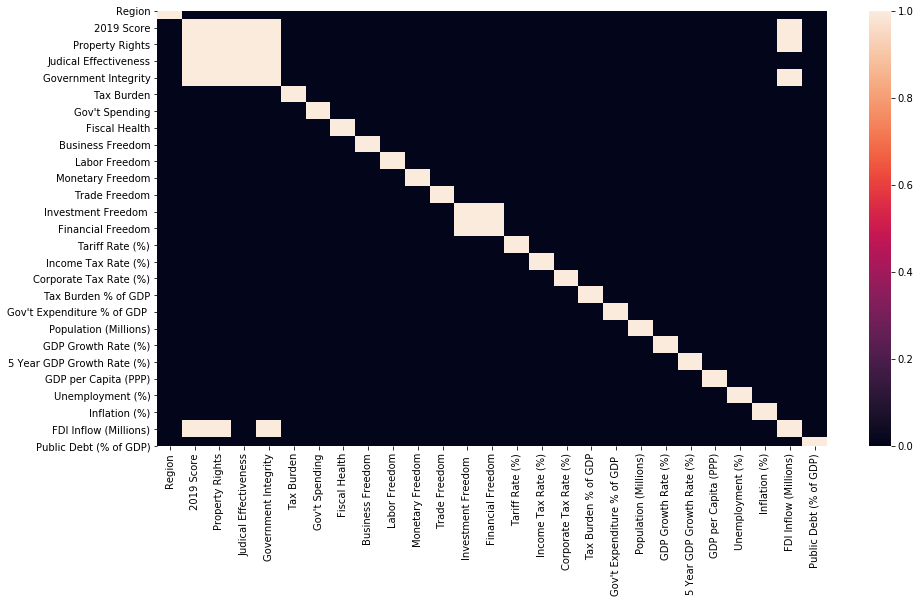

In [38]:
plt.tight_layout()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()>=0.8)

In [39]:
df.drop('Property Rights',axis=1,inplace=True)
df.drop('Government Integrity',axis=1,inplace=True)
df.drop('Financial Freedom',axis=1,inplace=True)

<Figure size 432x288 with 0 Axes>

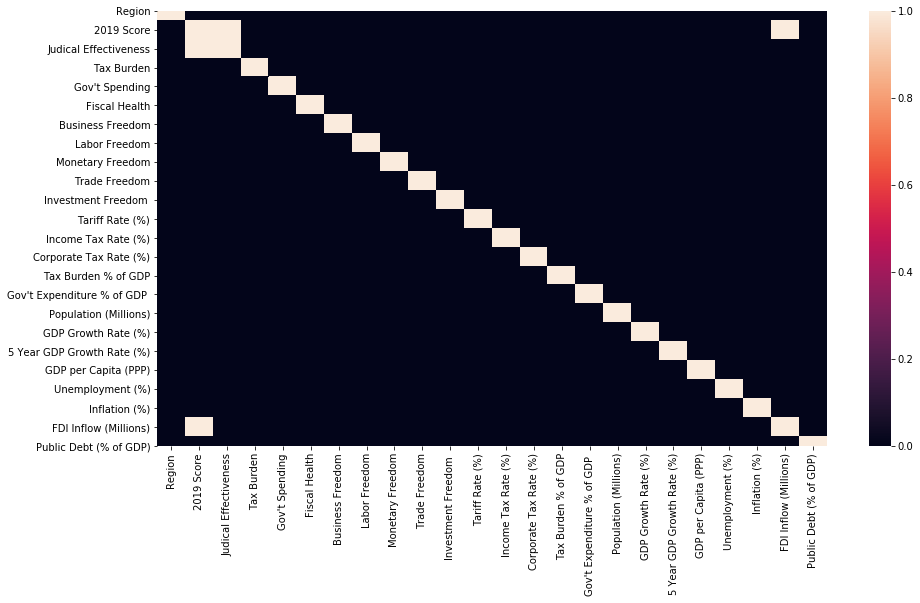

In [40]:
plt.tight_layout()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()>=0.8)

In [41]:
mms = MinMaxScaler()

In [42]:
for col in df.columns:
    df[col] = mms.fit_transform(df[[col]])

In [43]:
for col in df.columns:
    df[col] = list(stats.boxcox(df[col]+0.5))[0]

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop('2019 Score',axis=1)
y = df['2019 Score']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_train)
print(f"r^2: {r2_score(y_train, Y_pred)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_train, Y_pred))}")

r^2: 0.9932982659756661
rmse: 0.013140253545807274


In [51]:
feat_mod=sm.OLS(y_train,X_train)
feat_results=feat_mod.fit()
feat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             2019 Score   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              654.4
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                    3.55e-95
Time:                        11:09:36   Log-Likelihood:                          341.88
No. Observations:                 119   AIC:                                     -637.8
Df Residuals:                      96   BIC:                                     -573.8
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Region                         -0.0056      0.007     -0.803      0.424      -0.019       0.008
Judical Effectiveness           0.0689      0.015      4.576      0.000       0.039       0.099
Tax Burden                      0.0104      0.054      0.193      0.847      -0.096       0.117
Gov't Spending                 -0.1650      0.061     -2.719      0.008      -0.285      -0.045
Fiscal Health                   0.0480      0.008      6.087      0.000       0.032       0.064
Business Freedom                0.0823      0.015      5.460      0.000       0.052       0.112
Labor Freedom                   0.0301      0.010      2.946      0.004       0.010       0.050
Monetary Freedom                0.0096      0.007      1.465      0.146      -0.003       0.023
Trade Freedom                   0.0437      0.027      1.641      0.104      -0.009       0.097
Investment Freedom              0.0554      0.014      3.853      0.000       0.027       0.084
Tariff Rate (%)                 0.0026      0.014      0.182      0.856      -0.026       0.031
Income Tax Rate (%)             0.0034      0.037      0.092      0.927      -0.070       0.077
Corporate Tax Rate (%)         -0.0109      0.025     -0.432      0.666      -0.061       0.039
Tax Burden % of GDP            -0.0175      0.020     -0.886      0.378      -0.057       0.022
Gov't Expenditure % of GDP     -0.2385      0.067     -3.540      0.001      -0.372      -0.105
Population (Millions)       -2.085e-07   1.85e-06     -0.113      0.911   -3.88e-06    3.46e-06
GDP Growth Rate (%)            -0.0174      0.021     -0.826      0.411      -0.059       0.024
5 Year GDP Growth Rate (%)      0.0080      0.020      0.401      0.689      -0.032       0.048
GDP per Capita (PPP)            0.0036      0.005      0.773      0.441      -0.006       0.013
Unemployment (%)                0.0055      0.006      0.994      0.323      -0.006       0.017
Inflation (%)               -6.526e-13   4.18e-13     -1.563      0.121   -1.48e-12    1.76e-13
FDI Inflow (Millions)           0.6389      0.047     13.595      0.000       0.546       0.732
Public Debt (% of GDP)          0.0108      0.007      1.581      0.117      -0.003       0.024
==============================================================================
Omnibus:                       34.939   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.429
Skew:                          -0.005   Prob(JB):                    4.56e-128
Kurtosis:                      13.875   Cond. No.                     1.89e+12
==============================================================================

Warnings:
[1]

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)
print(f"r^2: {r2_score(y_test, Y_pred)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, Y_pred))}")

r^2: 0.991708941488759
rmse: 0.014011014923774979


In [55]:
coef_df = pd.DataFrame(lr.coef_).sort_values(by=0).T
coef_df.columns = X.columns
coef_df.T[::-1]

,0
Public Debt (% of GDP),5.867407e-01
FDI Inflow (Millions),8.941611e-02
Inflation (%),7.832635e-02
Unemployment (%),6.847706e-02
GDP per Capita (PPP),5.502734e-02
5 Year GDP Growth Rate (%),4.286624e-02
GDP Growth Rate (%),3.913676e-02
Population (Millions),1.184089e-02
Gov't Expenditure % of GDP,9.616892e-03
Tax Burden % of GDP,7.757327e-03
